In [1]:
%reload_ext autoreload
%autoreload 2

import string
import pandas as pd
import os


### VDJDB

Exploring VDJDB. The essential parts for TCR prediction
```
antigen.epitope: Amino acid sequence of the epitope.

cdr3: TCR complementarity determining region 3 (CDR3) amino acid sequence.

vdjdb.score: VDJdb confidence score, the higher is the score the more confidence we have in the antigen specificity annotation of a given TCR clonotype/clone. Zero score indicates that there are insufficient method details to draw any conclusion.
```

In [2]:
pd.set_option("display.max_colwidth", 100)
DB_PATH = 'db/'

vdjdb = pd.read_csv(os.path.join(DB_PATH,'vdjdb-2018-06-04', 'vdjdb.txt'), sep='\t')


vdjdb_metadata = pd.read_csv(os.path.join(DB_PATH, 'vdjdb-2018-06-04', 'vdjdb.meta.txt'), sep='\t')
vdjdb_metadata.index = vdjdb_metadata.name


vdjdb_metadata


,name,type,visible,searchable,autocomplete,data.type,title,comment
name,,,,,,,,
complex.id,complex.id,txt,0,0,0,complex.id,complex.id,TCR alpha and beta chain records having the same complex identifier belong to the same T-cell cl...
gene,gene,txt,1,1,1,factor,Gene,TCR chain: alpha or beta.
cdr3,cdr3,seq,1,1,0,cdr3,CDR3,TCR complementarity determining region 3 (CDR3) amino acid sequence.
v.segm,v.segm,txt,1,1,1,factor,V,TCR Variable segment allele.
j.segm,j.segm,txt,1,1,1,factor,J,TCR Joining segment allele.
species,species,txt,1,1,1,factor,Species,TCR parent species.
mhc.a,mhc.a,txt,1,1,1,factor,MHC A,First MHC chain allele.
mhc.b,mhc.b,txt,1,1,1,factor,MHC B,Second MHC chain allele (defaults to Beta2Microglobulin for MHC class I).
mhc.class,mhc.class,txt,1,1,1,factor,MHC class,MHC class (I or II).


### McPAS-TCR
```
CDR3.alpha.aa: Amino acide sequence on alpha chain on TCR
CDR3.beta.aa: Amino acide sequence on alpha chain on TCR
Epitope.peptide: Peptide sequence on epitope
```

In [3]:
mcpas_tcr = pd.read_csv(os.path.join(DB_PATH, 'McPAS-TCR.csv'), encoding="ISO-8859-1")


### IEDB
**What is this DB? What's happening when it is exported to csv?**

In [4]:
iedb = pd.read_csv(os.path.join(DB_PATH, 'iedb.csv'))
#iedb.rename(columns={'Description': 'epitope_seq',
#                     'Antigen Description':'antigen_seq'}, 
#            inplace=True)

In [5]:
# sample iEDB entry

{k: v for k, v in iedb.loc[1000, :].to_dict().items() if not pd.isna(v)}

{'T Cell ID': 1852427,
 'Reference ID': 1022198,
 'Type': 'Literature',
 'PubMed ID': 21490152,
 'Authors': 'Evan W Newell; Lauren K Ely; Andrew C Kruse; Philip A Reay; Stephanie N Rodriguez; Aaron E Lin; Michael S Kuhns; K Christopher Garcia; Mark M Davis',
 'Journal': 'J Immunol',
 'Date': 2011,
 'Title': 'Structural basis of specificity and cross-reactivity in T cell receptors specific for cytochrome c-I-E(k).',
 'Epitope ID': 3265,
 'Object Type': 'Linear peptide',
 'Description': 'ANERADLIAYLKQATK',
 'Starting Position': 93.0,
 'Ending Position': 108.0,
 'Antigen Name': 'Cytochrome c',
 'Organism Name': 'Manduca sexta',
 'Parent Species': 'Manduca sexta',
 'Parent Species ID': 7130.0,
 'Name': 'Mus musculus',
 'Host ID': 10090,
 'Process Type': 'Administration in vivo',
 'Immunogen Epitope Relation': 'Source Antigen',
 'Immunogen Object Type': 'Protein',
 'Immunogen Description': 'Cytochrome c',
 'Immunogen Organism Name': 'Manduca sexta',
 'Immunogen Organism Species': 'Manduca s

### Curate Database

vdjdb + mcpas_tcr

In [6]:
vdjdb_clean = vdjdb[vdjdb['vdjdb.score'] > 0][['antigen.epitope', 'cdr3']]
vdjdb_clean.rename(columns={'antigen.epitope': 'epitope'}, inplace=True)

# Cleaning mcpas_tcr
mcpas_tcr_clean = mcpas_tcr[['CDR3.alpha.aa', 'CDR3.beta.aa', 'Epitope.peptide']]
mcpas_tcr_clean = mcpas_tcr_clean[~mcpas_tcr_clean['Epitope.peptide'].isna()]
mcpas_tcr_clean = mcpas_tcr_clean.fillna('')
mcpas_tcr_clean['cdr3'] = mcpas_tcr_clean[['CDR3.alpha.aa','CDR3.beta.aa']].apply(lambda x: ''.join(x), axis=1)
mcpas_tcr_clean = mcpas_tcr_clean.drop(['CDR3.alpha.aa','CDR3.beta.aa'], axis=1)
mcpas_tcr_clean.rename(columns = {'Epitope.peptide': 'epitope'}, inplace=True)


ep_2_cdr3 = pd.concat([vdjdb_clean, mcpas_tcr_clean])
ep_2_cdr3.index = range(ep_2_cdr3.shape[0])
ep_2_cdr3 = ep_2_cdr3.drop_duplicates()



In [7]:
vdjdb_uncertain = vdjdb[vdjdb['vdjdb.score'] == 0][['antigen.epitope', 'cdr3']]
vdjdb_uncertain.rename(columns={'antigen.epitope': 'epitope'}, inplace=True)

# Maybe I can use the uncertain ones for evaluation?
#vdjdb_uncertain.to_csv('db/ep2cdr3_eval.csv')

In [8]:
print("Num Unique Epitopes: " + str(len(ep_2_cdr3.epitope.unique())))
print("Num Unique cdr33: " + str(len(ep_2_cdr3.cdr3.unique())))

ep_2_cdr3.head()
ep_2_cdr3 = ep_2_cdr3.sample(frac=1)
#ep_2_cdr3.to_csv('db/ep2cdr3_train.csv')

Num Unique Epitopes: 448
Num Unique cdr33: 17332


In [9]:
_valid_amino_acids = set([a for a in 'ACDEFGHIKLMNOPQRSTVWXY'])

def is_valid_sequence(seq):
    return len(set([a for a in seq]).difference(_valid_amino_acids)) == 0 and len(seq) > 0

df = ep_2_cdr3[ep_2_cdr3.epitope.apply(is_valid_sequence) & ep_2_cdr3.cdr3.apply(is_valid_sequence)]

In [16]:
df.epitope.sample(10).tolist()
"""
['YMPTTIIAA',
 'TVYGFCLL',
 'TPQDLNTML',
 'EAAGIGILTV',
 'ASNENMETM',
 'GILGFVFTL',
 'GILGFVFTL',
 'ASNENMETM',
 'HPKVSSEVHI',
 'LSLRNPILV']
"""

['YMPTTIIAA',
 'TVYGFCLL',
 'TPQDLNTML',
 'EAAGIGILTV',
 'ASNENMETM',
 'GILGFVFTL',
 'GILGFVFTL',
 'ASNENMETM',
 'HPKVSSEVHI',
 'LSLRNPILV']

In [18]:
df.to_csv('db/ep2cdr3_train.csv')

In [11]:
len(max(df.cdr3.tolist(), key=len))

40



Number of Unique Epitopes:438
Min: 8 amino acids
Max: 24 amino acids


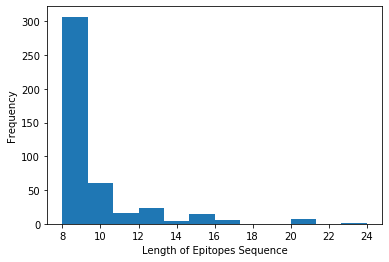

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(e) for e in df.epitope.unique().tolist()], bins=12)
plt.xlabel("Length of Epitopes Sequence")
plt.ylabel("Frequency")
print('\n\nNumber of Unique Epitopes:' + str(len(df.epitope.unique().tolist())))
print("Min: " + str(len(min(df.epitope.tolist(), key=len))) + " amino acids")
print("Max: " + str(len(max(df.epitope.tolist(), key=len))) + " amino acids")



Number of Unique CDR3s:17261
Min: 5 amino acids
Max: 40 amino acids


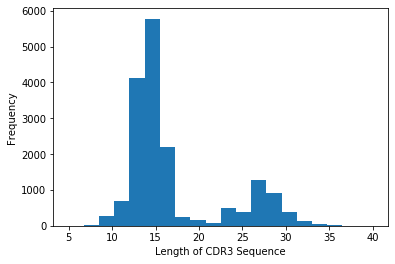

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(e) for e in df.cdr3.unique().tolist()], bins=20)
plt.xlabel("Length of CDR3 Sequence")
plt.ylabel("Frequency")
print('\n\nNumber of Unique CDR3s:' + str(len(df.cdr3.unique().tolist()))) 
print("Min: " + str(len(min(df.cdr3.tolist(), key=len))) + " amino acids")
print("Max: " + str(len(max(df.cdr3.tolist(), key=len))) + " amino acids")

count     438.000000
mean       40.858447
std       170.313772
min         1.000000
25%         2.000000
50%         4.000000
75%        12.750000
max      2142.000000
Name: cdr3, dtype: float64

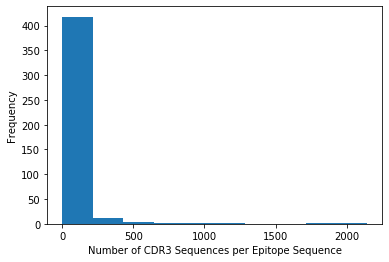

In [14]:
cdr3_counts = df.groupby('epitope').count().sort_values(by='cdr3', ascending=False)

plt.hist(cdr3_counts.cdr3.tolist())
plt.xlabel("Number of CDR3 Sequences per Epitope Sequence")
plt.ylabel("Frequency")

cdr3_counts.cdr3.describe()

### Data Load
Modified `data_load.py` from open-source [transformer](https://www.github.com/kyubyong/transformer) repository

In [ ]:
from transformer.data_load import *

df = pd.read_csv('db/ep2cdr3_train.csv')
epitopes = df.epitope.apply(str).tolist()
cdr3s = df.cdr3.apply(str).tolist()
batches = input_fn(epitopes, cdr3s, vocabs, batch_size=8, shuffle=False)


In [ ]:
vocabs = [a for a in 'ACDEFGHIKLMNOPQRSTVWXY']
 
def load_vocab(vocabs=vocabs):
    '''
    idx <-> token mapping
    These mappings are reserved
    0: <pad>, 1: <unk>, 2: <s>, 3: </s>
    '''
    token2idx = {token: idx+4 for idx, token in enumerate(vocabs)}
    token2idx.update({
         '<pad>': 0, '<unk>': 1, '<s>': 2, '</s>': 3
    }) 
    idx2token = {idx: token for token, idx in token2idx.items()}
 
    return token2idx, idx2token


In [ ]:
import tensorflow as tf

In [ ]:
inp = tf.constant([24]* 48, dtype=tf.int32)
_, idx2token = load_vocab()
def convert_idx_to_token_tensor(inputs, idx2token):
    def my_func(inputs):
        return "".join(idx2token[elem] for elem in inputs)
    
    return tf.py_func(my_func, [inputs], tf.string)